# k-nearest-Neighbour

## Load datasets

2024-12-13 14:59:16.094109: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2024-12-13 14:59:16.170131: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


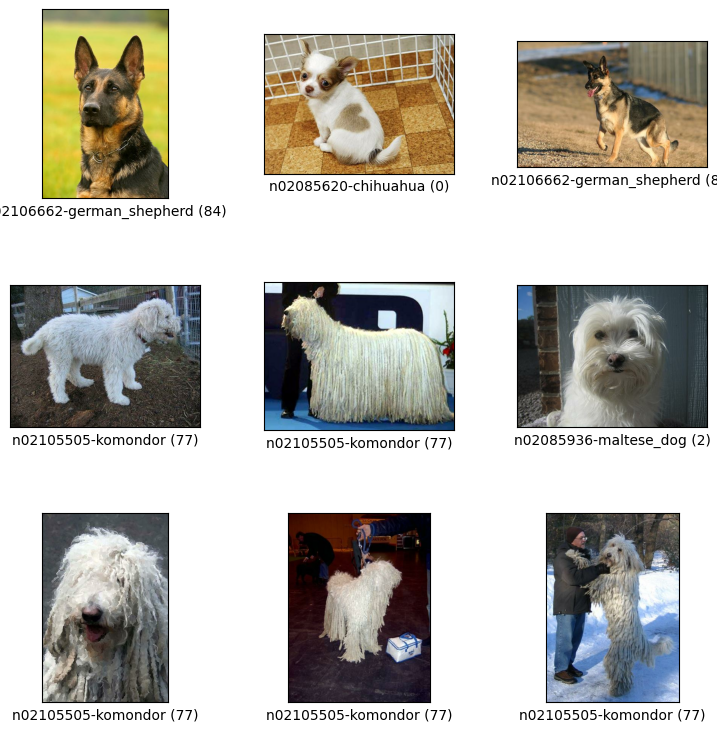

/var/folders/pb/8wrfvtz5593cjrgr_g89r70m0000gn/T/ipykernel_37448/1680334725.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
from pathlib import Path
import sys

notebook_dir = Path().resolve()
sys.path.append(str(notebook_dir.parent))

from setup import setup_dataset


train_dataset, test_dataset, metadata = setup_dataset('../dataset')

fig = tfds.show_examples(train_dataset, metadata)
fig.show()

## Merkmale
Die folgenden Merkmale wurden zur Merkmalsextraktion definiert:
https://gvpress.com/journals/IJMUE/vol8_no4/39.pdf

Farb-merkmale:
1. Helligkeit des Fells
2. Farbvarianz des Fells

Textur-merkmale:

3. Fellstruktur

Form-merkmale:

4. Form des Hunds auf dem Bild




Ideen:
- Histogramm
    - Maximaler Wert
    - Median
    - Mittelwert
    - Varianz/Standardabweichung
- Rechtecke
    - Anzahl der gefundenen Regionen
    - Avg(Höhe)/Avg(Breite)
- 



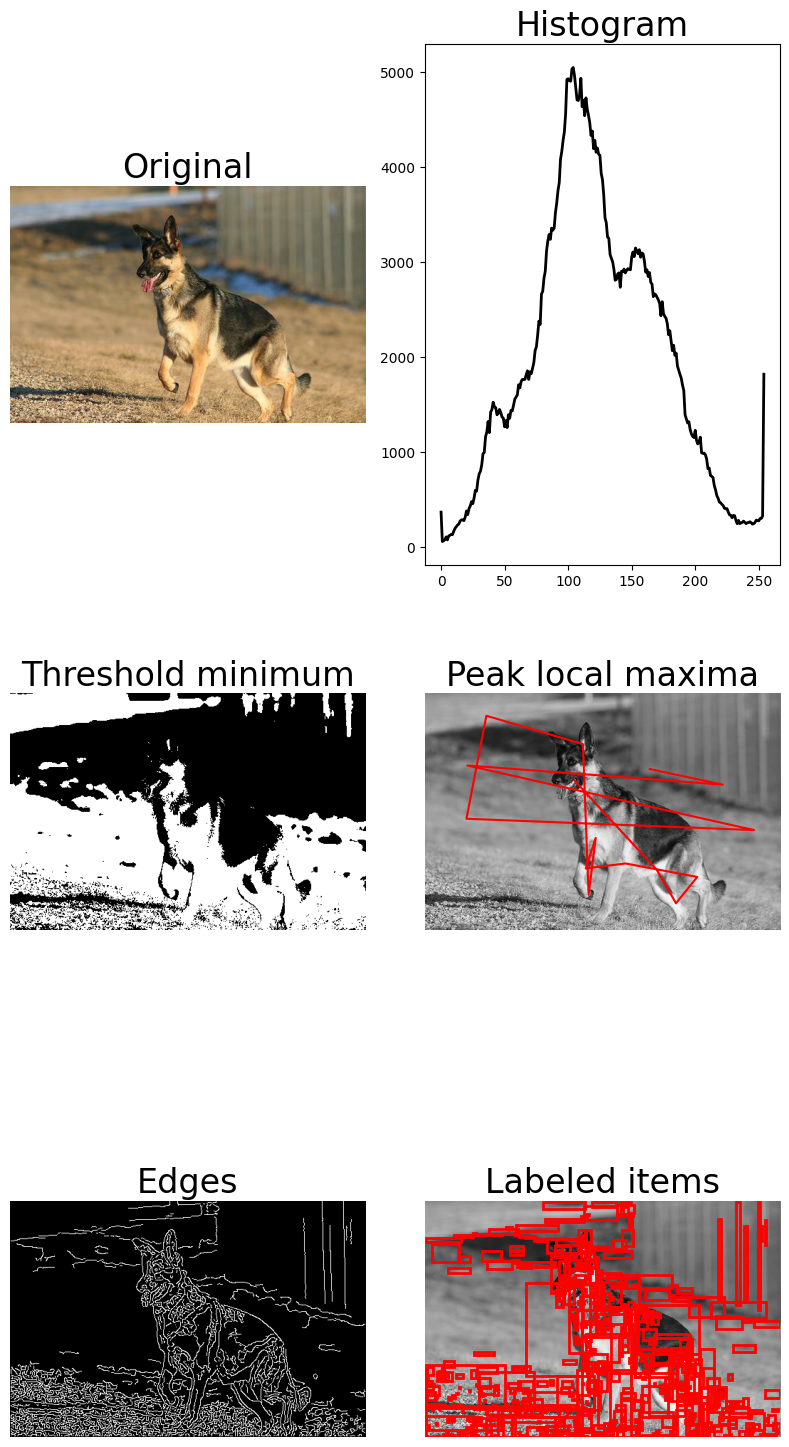

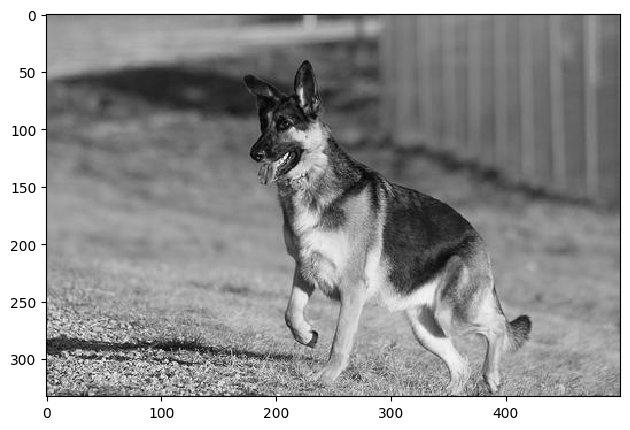

In [39]:
import cv2
import matplotlib.pyplot as plt
from skimage import filters, feature
from skimage.io import imshow
import numpy as np

"""for img, label in train_dataset:
    img_grayscale = tf.image.rgb_to_grayscale(img)
    img_np = img_grayscale.cpu().numpy()[:,:,0]
    img_canny = feature.canny(img_np)
    imshow(img_canny)"""

img = [element for element in train_dataset.take(5)][3][0]
img_grayscale = tf.image.rgb_to_grayscale(img)

img_np = img.numpy()
img_grayscale_np = img_grayscale.cpu().numpy()[:,:,0]


fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(8, 16))
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flat


# Original anzeigen
ax0.imshow(img)
ax0.set_title("Original", fontsize=24)
ax0.axis("off")


# Histogram anzeigen
values, bins = np.histogram(img, bins=np.arange(256))
ax1.plot(bins[:-1], values, lw=2, c="k")
ax1.set_title("Histogram", fontsize=24)
fig.set_tight_layout(tight=True)


# Divide Foreground and Background
from skimage.filters import threshold_minimum, try_all_threshold
threshold = threshold_minimum(img_grayscale_np, 95)
binary = img_grayscale > threshold
ax2.imshow(binary, cmap=plt.cm.gray)
ax2.set_title("Threshold minimum", fontsize=24)
ax2.axis("off")

# Maximum
from skimage.feature import peak_local_max
coordinates = peak_local_max(img_grayscale_np, min_distance=30)
ax3.imshow(img_grayscale_np, cmap=plt.cm.gray)
ax3.autoscale(False)
ax3.plot(coordinates[:,1],
         coordinates[:,0], c=(1.0,0.0,0.0))
ax3.set_title("Peak local maxima", fontsize=24)
ax3.axis("off")

# Canny filter
from skimage.feature import canny

edges = canny(img_grayscale_np)
ax4.imshow(edges, cmap=plt.cm.gray)
ax4.set_title("Edges", fontsize=24)
ax4.axis("off")

# image labeling
from skimage.measure import regionprops
import matplotlib.patches as mpatches
from skimage.morphology import label

label_image = label(edges)

ax5.imshow(img_grayscale_np, cmap=plt.cm.gray)
ax5.set_title("Labeled items", fontsize=24)
ax5.axis("off")

for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect=mpatches.Rectangle((minc, minr),maxc-minc, maxr-minr, fill=False, edgecolor="red", linewidth=2)
    ax5.add_patch(rect)

plt.tight_layout()
plt.show()




img_grayscale = tf.image.rgb_to_grayscale(img)
img_np = img_grayscale.cpu().numpy()[:,:,0]
img_canny = feature.canny(img_np)
imshow(img_np)